In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import datetime
from src.poly_reg import model_county
from src.poly_reg import model_state
from src.data_import import nyt

plt.style.use('ggplot')
font = {'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)

In [5]:
df = nyt()
print('done')

done


In [6]:
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [63]:
df['cs'] = df['county'] + ":" + df['state']

In [73]:
sdf = df[df['state'] == 'California']
len(sdf.county.unique())

52

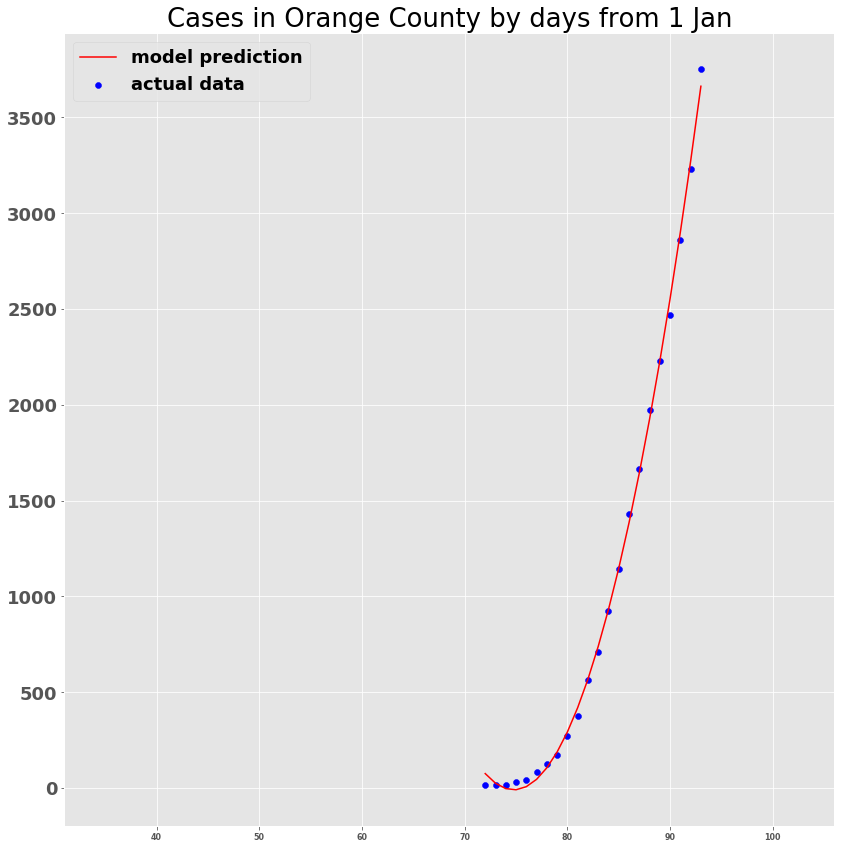

In [55]:
#Example plot
county = "Orange"
state = "California"
X, X_poly, y, lin = model_county(df, county, state)

fig, ax = plt.subplots(figsize=(12,12))
fig.tight_layout()
plt.title('Cases in {} County by days from 1 Jan'.format(county)) 

plt.scatter(X, y, color = 'blue', label="actual data") 
y1 = lin.predict(X_poly)
plt.plot(X, y1, color = 'red', label="model prediction") 

ax.legend()
ax.set_xlim([31, 106])
ax.tick_params(axis='x', labelsize=8)

plt.show() 

In [6]:
#Poly regression params by state
state_params = []
for state in df.state.unique():
    X, X_poly, y, lin = model_state(df, state)
    if not X is None:
        state_params.append([state, lin.intercept_[0], lin.coef_[0][1], lin.coef_[0][2]])
    #print(lin.coef_[0])
state_params

[['Washington', 37588.644544178074, -1142.8204020243697, 8.683592755283494],
 ['Illinois', 125160.68488398322, -3400.6775213670253, 23.05695970695691],
 ['California', 73915.8080479204, -2231.9861354267523, 16.693014370644754],
 ['Arizona', 33123.803921571285, -880.0857843137807, 5.840686274510085],
 ['Massachusetts', 161658.66515259573, -4340.03833333266, 29.05772283271904],
 ['Wisconsin', 24137.970027335334, -660.2633059921322, 4.516803372065906],
 ['Texas', 38588.64563176616, -1131.4225486211787, 8.215751023026879],
 ['Nebraska', 771.8138346486136, -24.452425380481966, 0.19392210418497835],
 ['Utah', 18269.511028563655, -490.8155130911311, 3.2998900413094474],
 ['Oregon', 13415.55557669156, -360.7861065708501, 2.4285268507241455],
 ['Florida', 188454.11180122383, -4992.126199886707, 33.030208921511594],
 ['Georgia', 108965.13239623397, -2848.0655591554923, 18.612975125565427],
 ['New Hampshire', 12774.082559334407, -328.5268317852281, 2.116099071206758],
 ['North Carolina', 35719.80

In [71]:
#Poly regression params by county
county_params = []
for cs in df.cs.unique(): #df.county.unique():
    county = cs.split(':')[0]
    state = cs.split(':')[1]
#    print("trying: {}".format(county))
    X, X_poly, y, lin = model_county(df, county, state)
    if not X is None:
        county_params.append([county, state, lin.intercept_[0], lin.coef_[0][1], lin.coef_[0][2]])
    #print(lin.coef_[0])
county_params

[['Snohomish',
  'Washington',
  7969.730365089076,
  -244.2679753297474,
  1.8776964484348277],
 ['Cook',
  'Illinois',
  91124.79189253542,
  -2481.2945299141707,
  16.863369963368058],
 ['Orange',
  'California',
  61764.60869564754,
  -1652.3577075097785,
  11.049407114623941],
 ['Maricopa',
  'Arizona',
  19708.818627453147,
  -524.6728586171632,
  3.488906088751368],
 ['Los Angeles',
  'California',
  51133.8645995608,
  -1425.5252363738598,
  9.894257508343081],
 ['Santa Clara',
  'California',
  7104.1529077530595,
  -211.24765503706374,
  1.5742032516817501],
 ['Suffolk',
  'Massachusetts',
  192891.44034183424,
  -5192.449765885412,
  34.88532144183943],
 ['San Francisco',
  'California',
  4649.431192370473,
  -132.64644646540367,
  0.9482863879415157],
 ['Dane',
  'Wisconsin',
  1033.61945304432,
  -36.25986842105253,
  0.29960010319918096],
 ['San Diego',
  'California',
  18723.318933693165,
  -493.69961266792404,
  3.266347687399685],
 ['Bexar',
  'Texas',
  2033.3675448

In [7]:
#Write to file
import csv
with open('./data/processed/state_poly_params.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(state_params)

In [8]:
len(county_params)

51